In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
#sns.set(style="ticks", palette="pastel")

PATH = 'C:/Users/user/Desktop/AI & ML/Project/FordB/'

In [2]:
#read training file, in future this will be called as function
#df_read = pd.read_csv(PATH+"FordB_Train_TAO.csv",names=["file_name","label"],header=None)

df_read = pd.read_csv(PATH+"FordB_Train_2018_TA.csv",names=["file_name","label"],header=None)

In [3]:
#A feature Dataframe, feature columns will be added later
df_feature = df_read.set_index("file_name")
df_feature.shape

(3636, 1)

In [4]:
#create a df with details of all csv in training file
df_result = pd.DataFrame(index=range(0,500))

for eachfile in df_read["file_name"].tolist():
    df_test = pd.read_csv(PATH+eachfile+".csv",names=[eachfile],header=None)
    df_result[eachfile] = df_test


In [5]:
#transpose of resut DF
result = df_result.T
#print result DF
result.head()

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
FordB_Test_1,-0.73127,-0.33171,0.18021,0.729360,1.22670,1.58490,1.71910,1.62240,1.349600,0.957590,...,-0.17538,-0.22674,-0.31425,-0.46590,-0.68874,-0.95381,-1.21300,-1.41800,-1.51590,-1.507300
FordB_Test_2,1.62590,1.17490,0.63356,0.097815,-0.32398,-0.52268,-0.50108,-0.30994,-0.053305,0.074495,...,0.64503,0.14904,-0.35020,-0.76317,-1.02810,-1.14680,-1.08220,-0.87240,-0.59911,-0.264920
FordB_Test_3,0.94352,0.92845,0.95955,0.991250,0.99644,0.95998,0.83128,0.58011,0.235420,-0.143360,...,-0.63761,-0.47333,-0.33208,-0.24699,-0.23034,-0.28339,-0.31247,-0.28219,-0.17318,-0.034611
FordB_Test_4,-0.99033,-1.20100,-1.38350,-1.503300,-1.53810,-1.42000,-1.12120,-0.66909,-0.146010,0.340560,...,-1.91890,-1.11260,-0.27155,0.49554,1.10510,1.48930,1.60890,1.50960,1.29810,1.038500
FordB_Test_5,1.01450,0.68876,0.37249,0.081209,-0.18853,-0.46443,-0.75948,-1.06890,-1.362900,-1.605800,...,0.41472,0.66133,0.82791,0.87550,0.80933,0.68508,0.55266,0.46789,0.45416,0.499380


In [6]:
#adding columns in feature df, each column represent a feature
df_feature["mean"] = result.mean(axis=1)
df_feature["var"] = result.var(axis=1)
df_feature["std"] = result.std(axis=1)
df_feature["skew"] = result.skew(axis=1)
df_feature["kurt"] = result.kurt(axis=1)
df_feature["mode"] = result.max(axis=1) - result.min(axis=1)
df_feature["kurtosis"] = result.kurtosis(axis=1)

# Feature selection in Time Domain

Below cells are to visualise different feature in Time domain.


# Comparison of Mean's for Good vs Bad engine

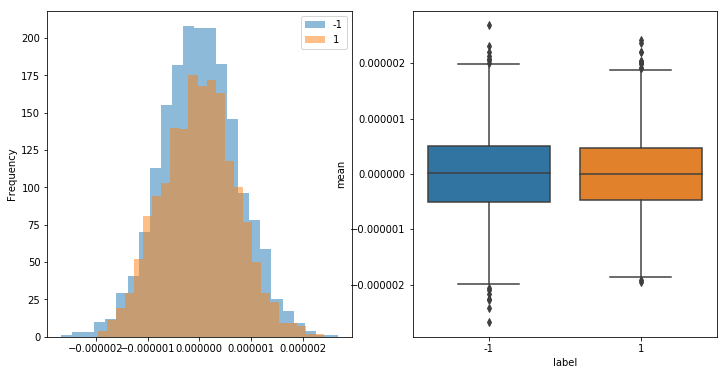

In [7]:
fig, ax = plt.subplots(ncols=2,figsize=(12,6))
df_feature.groupby("label")["mean"].plot.hist(legend=True,bins=25,alpha=0.5,ax =ax[0])
sns.boxplot(x = 'label', y = 'mean', data = df_feature,ax=ax[1])
#sns.scatterplot(x = 'mean',y = 'mean', data = df_feature,ax=ax[2])

# Comparison of Variance's for Good vs Bad engine

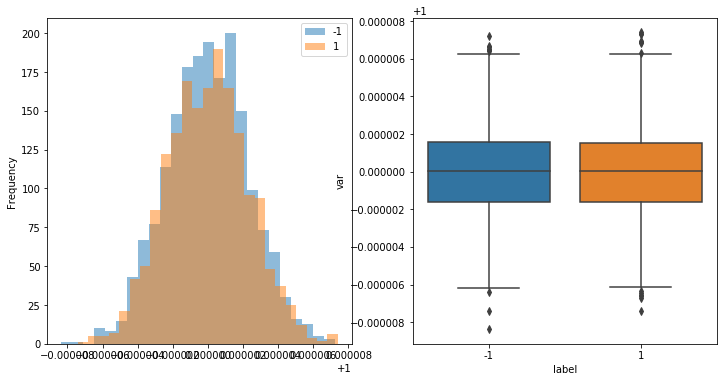

In [8]:
fig, ax = plt.subplots(ncols=2,figsize=(12,6))
df_feature.groupby("label")["var"].plot.hist(legend=True,bins=25,alpha=0.5,ax =ax[0])
sns.boxplot(x = 'label', y = 'var', data = df_feature,ax=ax[1])

# Comparison of Mean's for Good vs Bad engine

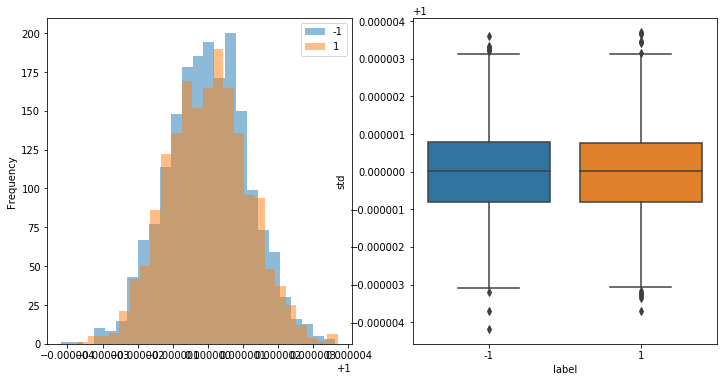

In [9]:
fig, ax = plt.subplots(ncols=2,figsize=(12,6))
df_feature.groupby("label")["std"].plot.hist(legend=True,bins=25,alpha=0.5,ax =ax[0])
sns.boxplot(x = 'label', y = 'std', data = df_feature,ax=ax[1])

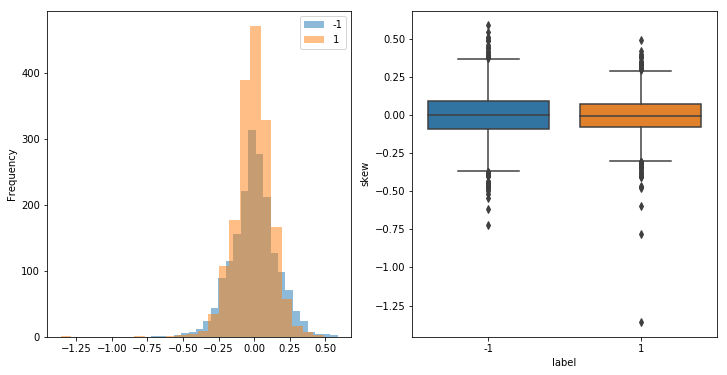

In [10]:
fig, ax = plt.subplots(ncols=2,figsize=(12,6))
df_feature.groupby("label")["skew"].plot.hist(legend=True,bins=25,alpha=0.5,ax =ax[0])
sns.boxplot(x = 'label', y = 'skew', data = df_feature,ax=ax[1])

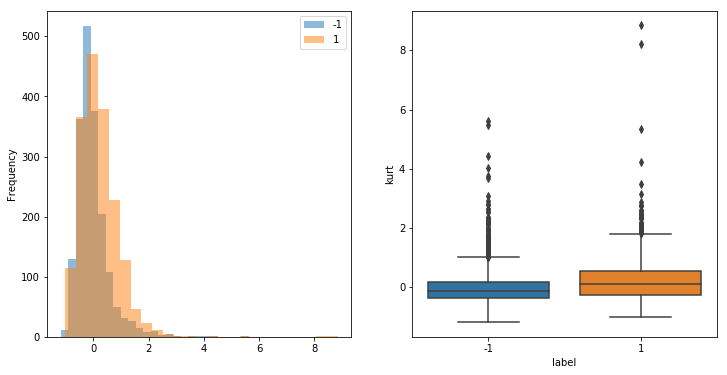

In [11]:
fig, ax = plt.subplots(ncols=2,figsize=(12,6))
df_feature.groupby("label")["kurt"].plot.hist(legend=True,bins=25,alpha=0.5,ax =ax[0])
sns.boxplot(x = 'label', y = 'kurt', data = df_feature,ax=ax[1])

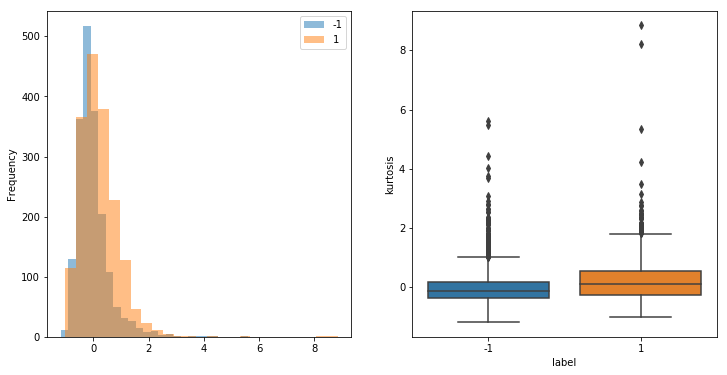

In [12]:
fig, ax = plt.subplots(ncols=2,figsize=(12,6))
df_feature.groupby("label")["kurtosis"].plot.hist(legend=True,bins=25,alpha=0.5,ax =ax[0])
sns.boxplot(x = 'label', y = 'kurtosis', data = df_feature,ax=ax[1])

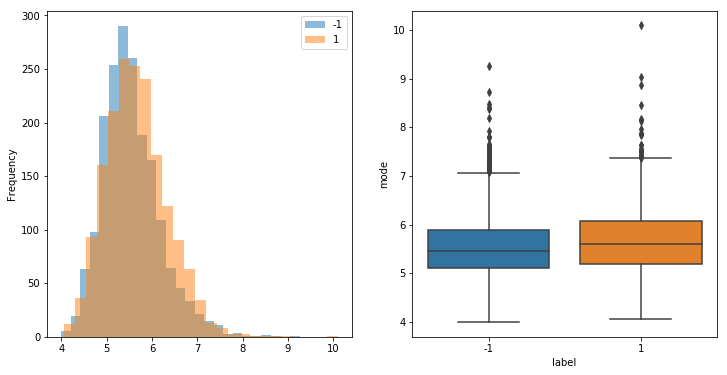

In [13]:
fig, ax = plt.subplots(ncols=2,figsize=(12,6))
df_feature.groupby("label")["mode"].plot.hist(legend=True,bins=25,alpha=0.5,ax =ax[0])
sns.boxplot(x = 'label', y = 'mode', data = df_feature,ax=ax[1])

# ZCR plot

In [14]:
def zero_crossing_rate_BruteForce(enginedata):
    
    zero_crossings = 0
    
    for i in range(1, len(enginedata)):
        
        if ( enginedata[i - 1] <  0 and enginedata[i] >  0 ) or \
           ( enginedata[i - 1] >  0 and enginedata[i] <  0 ) or \
           ( enginedata[i - 1] != 0 and enginedata[i] == 0):
                
                zero_crossings += 1
                
    zero_crossing_rate = zero_crossings / float(len(enginedata) - 1)

    return zero_crossing_rate

In [15]:
zcr = []
for j in range(0,result.shape[0]):
    zcr.append(zero_crossing_rate_BruteForce(result.iloc[j]))

In [16]:
df_feature["zcr"] = zcr

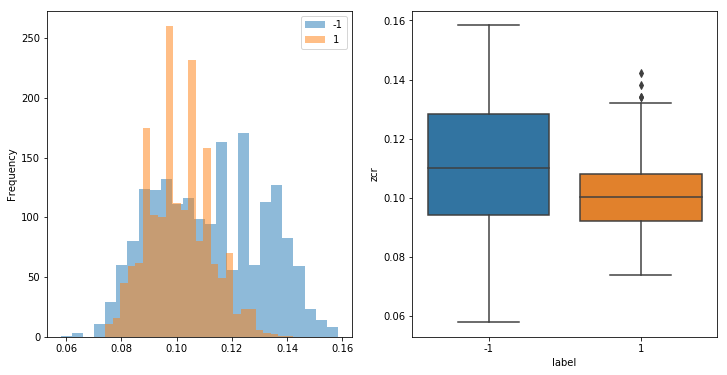

In [17]:
fig, ax = plt.subplots(ncols=2,figsize=(12,6))
df_feature.groupby("label")["zcr"].plot.hist(legend=True,bins=25,alpha=0.5,ax =ax[0])
sns.boxplot(x = 'label', y = 'zcr', data = df_feature,ax=ax[1])

# RMS plot

In [18]:
df_feature["rms"] = result.pow(2).sum(axis=1) / 500
df_feature["rms"] = df_feature["rms"].pow(1/2)

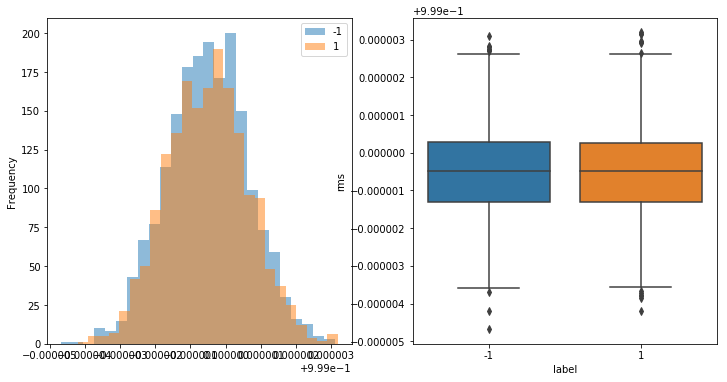

In [19]:
fig, ax = plt.subplots(ncols=2,figsize=(12,6))
df_feature.groupby("label")["rms"].plot.hist(legend=True,bins=25,alpha=0.5,ax =ax[0])
sns.boxplot(x = 'label', y = 'rms', data = df_feature,ax=ax[1])

# Energy Data plot

In [20]:
df_feature['energy'] = result.pow(2).sum(axis=1)

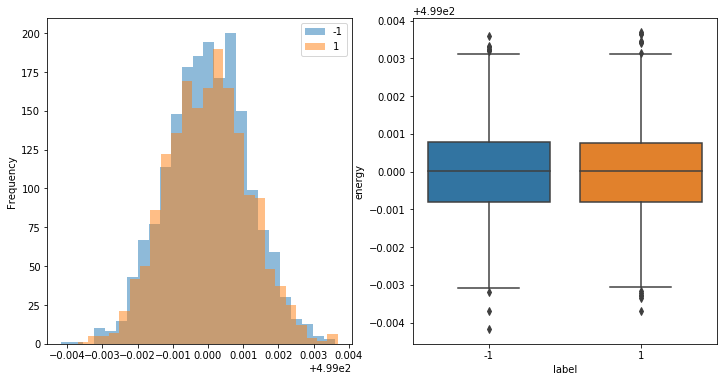

In [21]:
fig, ax = plt.subplots(ncols=2,figsize=(12,6))
df_feature.groupby("label")["energy"].plot.hist(legend=True,bins=25,alpha=0.5,ax =ax[0])
sns.boxplot(x = 'label', y = 'energy', data = df_feature,ax=ax[1])

# Crest Factor

In [22]:
df_feature['CF'] = result.abs().max(axis=1)/result.pow(2).mean(axis=1).pow(1/2)

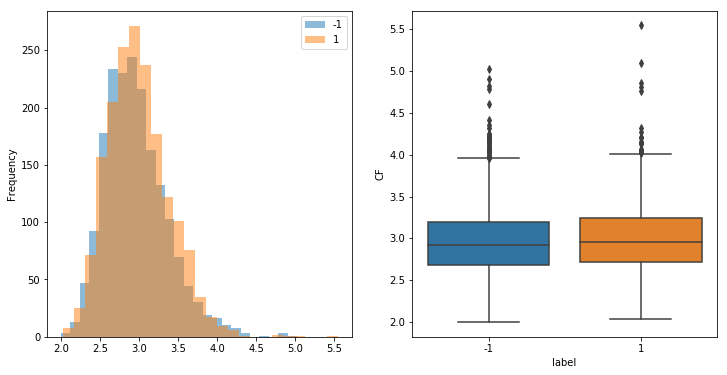

In [23]:
fig, ax = plt.subplots(ncols=2,figsize=(12,6))
df_feature.groupby("label")["CF"].plot.hist(legend=True,bins=25,alpha=0.5,ax =ax[0])
sns.boxplot(x = 'label', y = 'CF', data = df_feature,ax=ax[1])

# Visualising Sensor Data

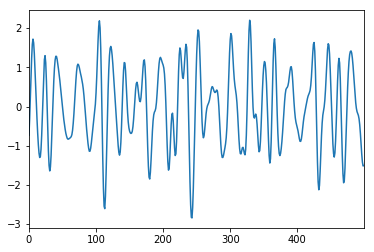

In [24]:
#sample plot of good engine data
result.iloc[0].plot()

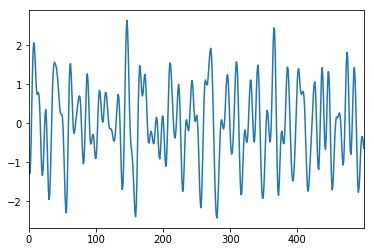

In [25]:
# plot of a bad engine data in time domain
result.iloc[12].plot()

# Feature analysis in Frequency Domain

# Mean plot in FFT

In [26]:
from scipy.fftpack import fft,fftfreq
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline



# Adding fft features

In [27]:
result_fft = pd.DataFrame([(2/500 * np.abs(fft(result.iloc[x])[0:np.int(500/2)])) for x in range(0,result.shape[0])],index=df_feature.index)

df_feature['mean_fft'] = result_fft.mean(axis=1)
df_feature['std_fft'] = result_fft.std(axis=1)
df_feature['var_fft'] = result_fft.var(axis=1)
df_feature['skew_fft'] = result_fft.skew(axis=1)
df_feature['kurt_fft'] = result_fft.kurt(axis=1)
df_feature['kurtosis_fft'] = result_fft.kurtosis(axis=1)
df_feature['energy_fft'] = result_fft.pow(2).sum(axis=1)
df_feature["rms_fft"] = result_fft.pow(2).sum(axis=1) / 500
df_feature["rms_fft"] = df_feature["rms_fft"].pow(1/2)
df_feature.head()

,label,mean,var,std,skew,kurt,mode,kurtosis,zcr,rms,energy,CF,mean_fft,std_fft,var_fft,skew_fft,kurt_fft,kurtosis_fft,energy_fft,rms_fft
file_name,,,,,,,,,,,,,,,,,,,,
FordB_Test_1,1,1.438000e-06,1.000001,1.000000,-0.142326,-0.564986,5.0407,-0.564986,0.084168,0.999000,499.000365,2.843644,0.032083,0.083562,0.006983,3.517555,13.107604,13.107604,1.996001,0.063182
FordB_Test_2,-1,1.227400e-06,1.000003,1.000002,0.270079,-0.168441,5.5787,-0.168441,0.130261,0.999001,499.001741,3.074471,0.039300,0.080407,0.006465,2.852645,8.421767,8.421767,1.996002,0.063182
FordB_Test_3,-1,5.086000e-07,0.999999,1.000000,0.101556,1.721307,7.3178,1.721307,0.114228,0.998999,498.999618,4.156961,0.034715,0.082499,0.006806,3.864725,19.670762,19.670762,1.995997,0.063182
FordB_Test_4,-1,4.536000e-07,1.000002,1.000001,0.055273,-0.104808,5.8846,-0.104808,0.098196,0.999001,499.001012,3.045944,0.034123,0.082747,0.006847,4.869988,30.739519,30.739519,1.995999,0.063182
FordB_Test_5,-1,5.948000e-07,1.000000,1.000000,-0.155438,0.103121,5.5393,0.103121,0.088176,0.998999,498.999999,2.839441,0.023664,0.086336,0.007454,7.679739,68.804244,68.804244,1.995999,0.063182


# Plots in Frequency domain

Mean Plot

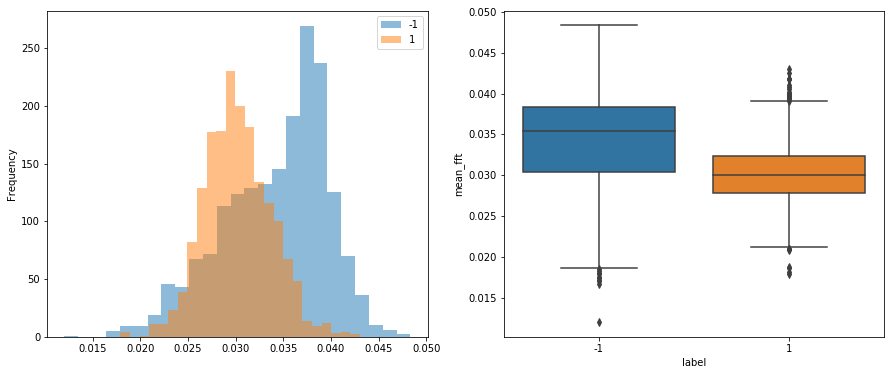

In [28]:
fig, ax = plt.subplots(ncols=2,figsize=(15,6))
df_feature.groupby("label")["mean_fft"].plot.hist(legend=True,bins=25,alpha=0.5,ax =ax[0])
sns.boxplot(x = 'label', y = 'mean_fft', data = df_feature,ax=ax[1])

STD Plot

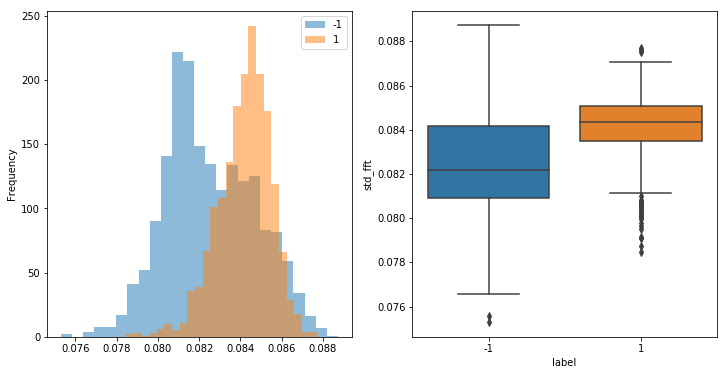

In [29]:
fig, ax = plt.subplots(ncols=2,figsize=(12,6))
df_feature.groupby("label")["std_fft"].plot.hist(legend=True,bins=25,alpha=0.5,ax =ax[0])
sns.boxplot(x = 'label', y = 'std_fft', data = df_feature,ax=ax[1])

Var Plot

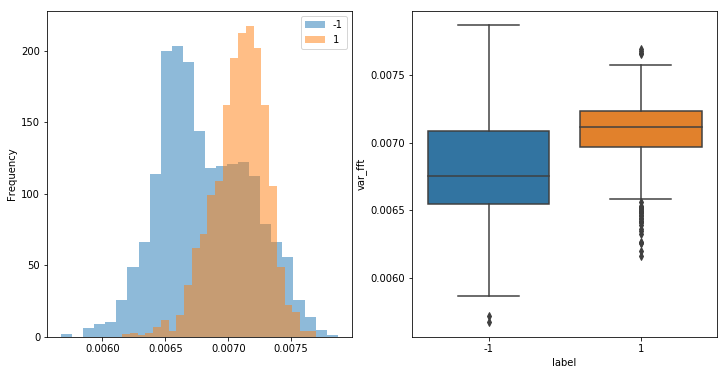

In [30]:
fig, ax = plt.subplots(ncols=2,figsize=(12,6))
df_feature.groupby("label")["var_fft"].plot.hist(legend=True,bins=25,alpha=0.5,ax =ax[0])
sns.boxplot(x = 'label', y = 'var_fft', data = df_feature,ax=ax[1])

Skew Plot

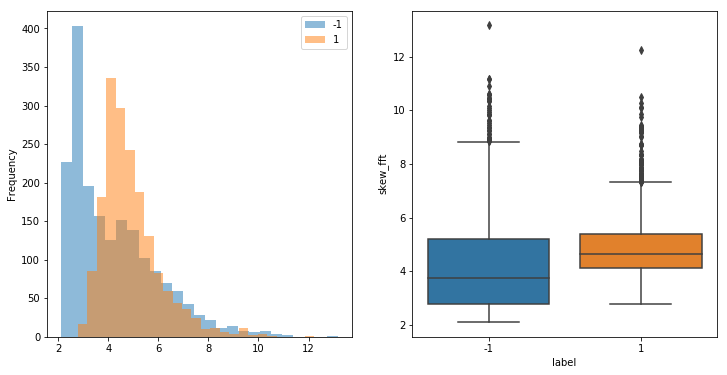

In [31]:
fig, ax = plt.subplots(ncols=2,figsize=(12,6))
df_feature.groupby("label")["skew_fft"].plot.hist(legend=True,bins=25,alpha=0.5,ax =ax[0])
sns.boxplot(x = 'label', y = 'skew_fft', data = df_feature,ax=ax[1])

Kurt Plot

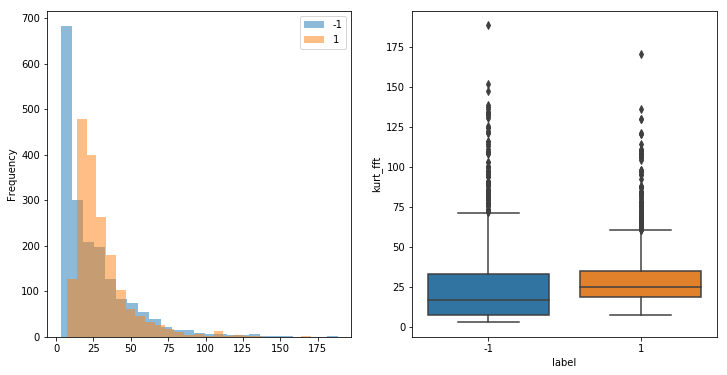

In [32]:
fig, ax = plt.subplots(ncols=2,figsize=(12,6))
df_feature.groupby("label")["kurt_fft"].plot.hist(legend=True,bins=25,alpha=0.5,ax =ax[0])
sns.boxplot(x = 'label', y = 'kurt_fft', data = df_feature,ax=ax[1])

Kurtosis Plot

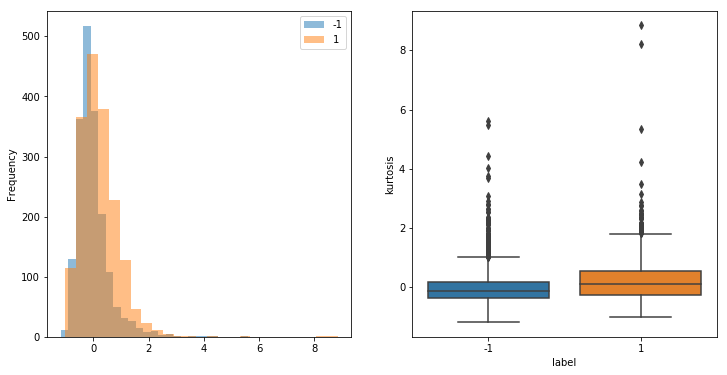

In [33]:
fig, ax = plt.subplots(ncols=2,figsize=(12,6))
df_feature.groupby("label")["kurtosis"].plot.hist(legend=True,bins=25,alpha=0.5,ax =ax[0])
sns.boxplot(x = 'label', y = 'kurtosis', data = df_feature,ax=ax[1])

Energy Plot

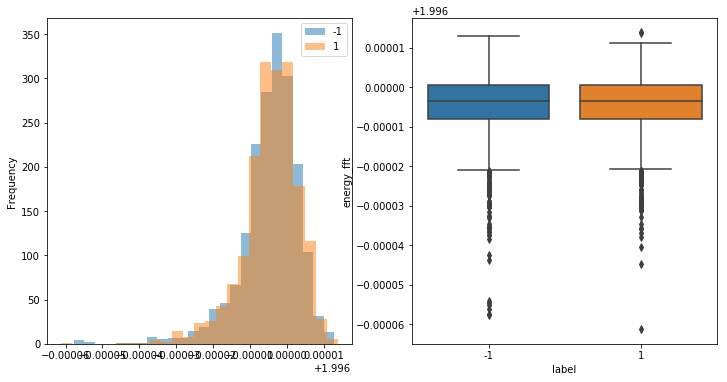

In [34]:
fig, ax = plt.subplots(ncols=2,figsize=(12,6))
df_feature.groupby("label")["energy_fft"].plot.hist(legend=True,bins=25,alpha=0.5,ax =ax[0])
sns.boxplot(x = 'label', y = 'energy_fft', data = df_feature,ax=ax[1])

RMS Plot

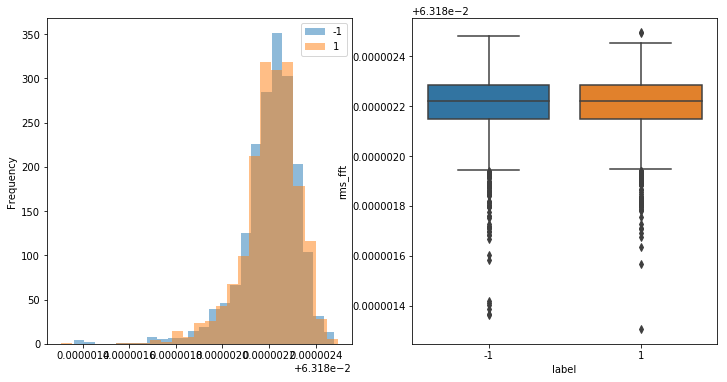

In [35]:
fig, ax = plt.subplots(ncols=2,figsize=(12,6))
df_feature.groupby("label")["rms_fft"].plot.hist(legend=True,bins=25,alpha=0.5,ax =ax[0])
sns.boxplot(x = 'label', y = 'rms_fft', data = df_feature,ax=ax[1])

In [36]:
result_fft['label'] = df_feature['label']

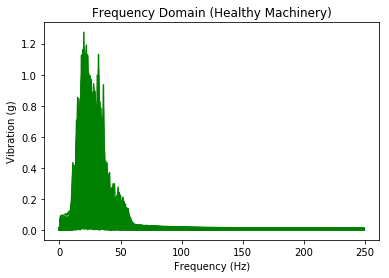

In [37]:
# FFT superimpose Good engine
result_fft_good = result_fft[result_fft['label'] == 1]
result_fft_good = result_fft_good.drop(['label'],axis=1)
for ix in range(0,result_fft_good.shape[0]):
    plt.plot([i for i in range(0,250)], result_fft_good.iloc[ix], linestyle='-', color='green')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Vibration (g)')
plt.title('Frequency Domain (Healthy Machinery)');

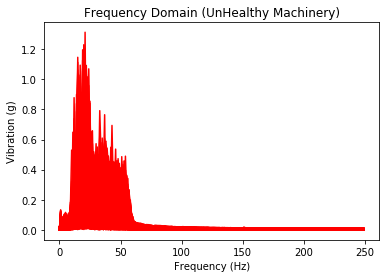

In [38]:
# FFT superimpose Bad engine
result_fft_bad = result_fft[result_fft['label'] == -1]
result_fft_bad = result_fft_bad.drop(['label'],axis=1)
for ix in range(0,result_fft_bad.shape[0]):
    plt.plot([i for i in range(0,250)], result_fft_bad.iloc[ix], linestyle='-', color='red')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Vibration (g)')
plt.title('Frequency Domain (UnHealthy Machinery)');

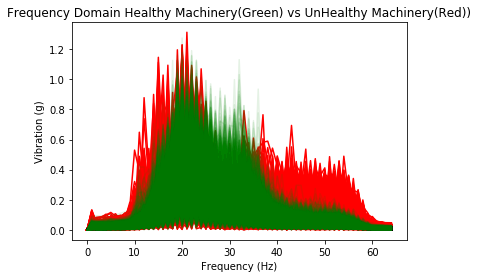

In [39]:
# FFT superimpose Good engine vs Bad engine
result_fft_good = result_fft[result_fft['label'] == 1]
result_fft_good = result_fft_good.drop(['label'],axis=1)
result_fft_bad = result_fft[result_fft['label'] == -1]
result_fft_bad = result_fft_bad.drop(['label'],axis=1)
for ix in range(0,result_fft_bad.shape[0]):
    plt.plot([i for i in range(0,65)], result_fft_bad.iloc[ix][0:65], linestyle='-', color='red')
for ix in range(0,result_fft_good.shape[0]):
    plt.plot([i for i in range(0,65)], result_fft_good.iloc[ix][0:65], linestyle='-', color='green',alpha = 0.1)

plt.xlabel('Frequency (Hz)')
plt.ylabel('Vibration (g)')
plt.title('Frequency Domain Healthy Machinery(Green) vs UnHealthy Machinery(Red))');

# FFT -WINDOWED

In [40]:
result_fft_windowed = result_fft.drop([i for i in range(66,250)],axis=1)
result_fft_windowed = result_fft_windowed.drop([i for i in range(0,20)],axis=1)
result_fft_windowed = result_fft_windowed.drop(['label'],axis=1)
result_fft_windowed.head()

,20,21,22,23,24,25,26,27,28,29,...,56,57,58,59,60,61,62,63,64,65
file_name,,,,,,,,,,,,,,,,,,,,,
FordB_Test_1,0.385069,0.049339,0.415175,0.104231,0.248106,0.321969,0.445911,0.168461,0.154105,0.147970,...,0.078625,0.017392,0.027344,0.003159,0.005341,0.001454,0.002588,0.004080,0.003911,0.001809
FordB_Test_2,0.208852,0.161627,0.096154,0.050904,0.317983,0.037307,0.133721,0.108499,0.385193,0.289137,...,0.140861,0.106218,0.070508,0.038589,0.031848,0.019347,0.015668,0.013283,0.007385,0.010398
FordB_Test_3,0.189720,0.682949,0.304198,0.286947,0.357019,0.440354,0.127490,0.091815,0.288408,0.127973,...,0.125162,0.066596,0.096575,0.058853,0.035312,0.015863,0.020306,0.008065,0.006255,0.007539
FordB_Test_4,0.725641,0.405803,0.615126,0.296776,0.158017,0.236935,0.202001,0.254813,0.100716,0.089878,...,0.075318,0.034523,0.004736,0.018345,0.005685,0.003054,0.004295,0.008223,0.006639,0.006837
FordB_Test_5,0.776306,0.910624,0.222059,0.259756,0.116700,0.103954,0.047342,0.045574,0.112592,0.019544,...,0.035226,0.011966,0.027582,0.005364,0.008841,0.009020,0.008418,0.007136,0.007199,0.006950


In [41]:
#adding columns in feature df, each column represent a feature
df_feature["mean_fftw"] = result_fft_windowed.mean(axis=1)
df_feature["var_fftw"] = result_fft_windowed.var(axis=1)
df_feature["std_fftw"] = result_fft_windowed.std(axis=1)
df_feature["skew_fftw"] = result_fft_windowed.skew(axis=1)
df_feature["kurt_fftw"] = result_fft_windowed.kurt(axis=1)
df_feature["mode_fftw"] = result_fft_windowed.max(axis=1) - result.min(axis=1)
df_feature["kurtosis_fftw"] = result_fft_windowed.kurtosis(axis=1)

Mean Plot

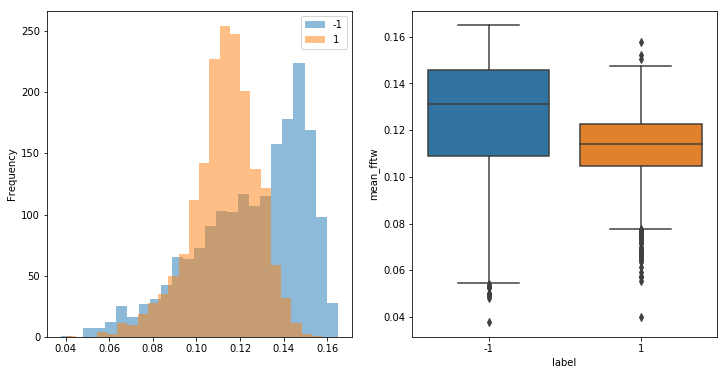

In [42]:
fig, ax = plt.subplots(ncols=2,figsize=(12,6))
df_feature.groupby("label")["mean_fftw"].plot.hist(legend=True,bins=25,alpha=0.5,ax =ax[0])
sns.boxplot(x = 'label', y = 'mean_fftw', data = df_feature,ax=ax[1])

Var PLot

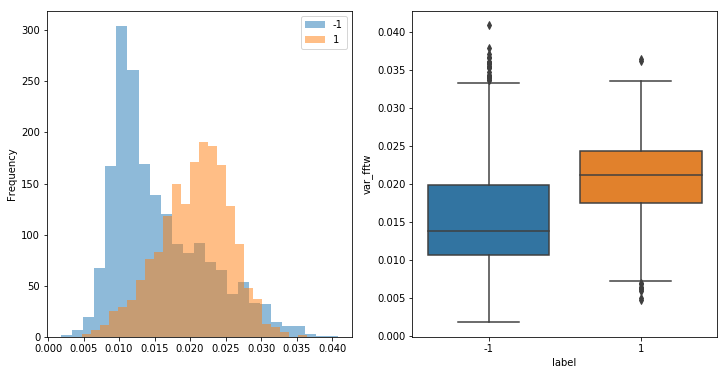

In [43]:
fig, ax = plt.subplots(ncols=2,figsize=(12,6))
df_feature.groupby("label")["var_fftw"].plot.hist(legend=True,bins=25,alpha=0.5,ax =ax[0])
sns.boxplot(x = 'label', y = 'var_fftw', data = df_feature,ax=ax[1])

std plot

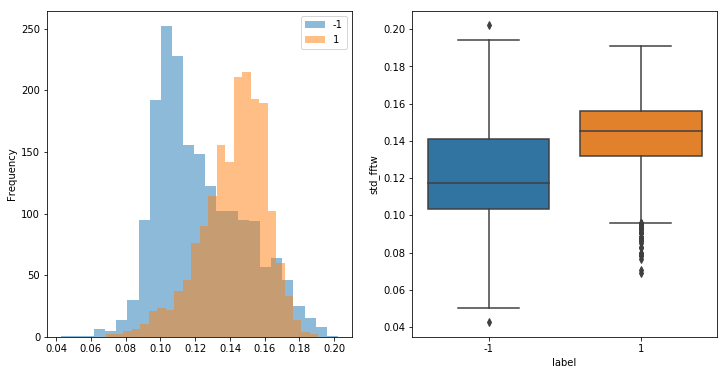

In [44]:
fig, ax = plt.subplots(ncols=2,figsize=(12,6))
df_feature.groupby("label")["std_fftw"].plot.hist(legend=True,bins=25,alpha=0.5,ax =ax[0])
sns.boxplot(x = 'label', y = 'std_fftw', data = df_feature,ax=ax[1])

skew plot

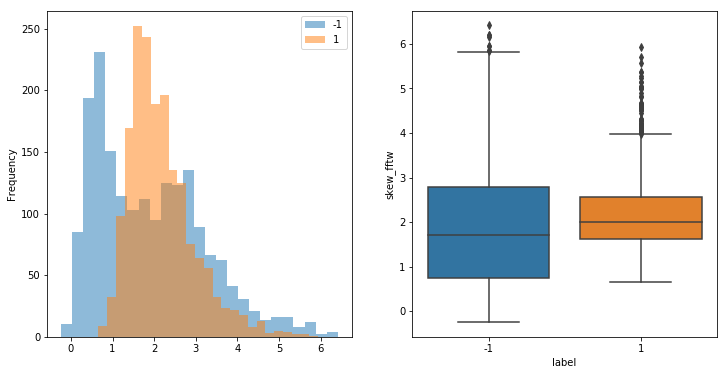

In [45]:
fig, ax = plt.subplots(ncols=2,figsize=(12,6))
df_feature.groupby("label")["skew_fftw"].plot.hist(legend=True,bins=25,alpha=0.5,ax =ax[0])
sns.boxplot(x = 'label', y = 'skew_fftw', data = df_feature,ax=ax[1])

kurt plot

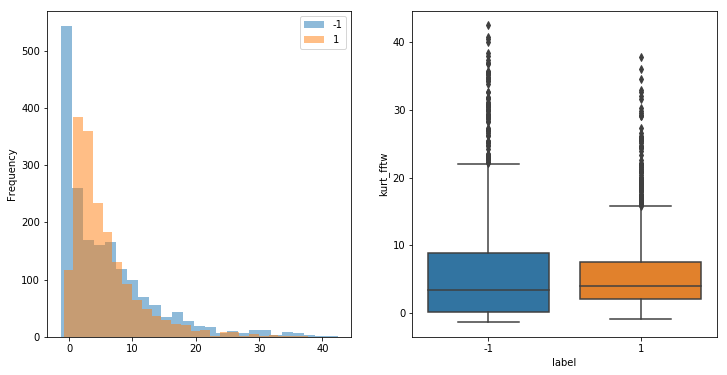

In [46]:
fig, ax = plt.subplots(ncols=2,figsize=(12,6))
df_feature.groupby("label")["kurt_fftw"].plot.hist(legend=True,bins=25,alpha=0.5,ax =ax[0])
sns.boxplot(x = 'label', y = 'kurt_fftw', data = df_feature,ax=ax[1])

Mode plot

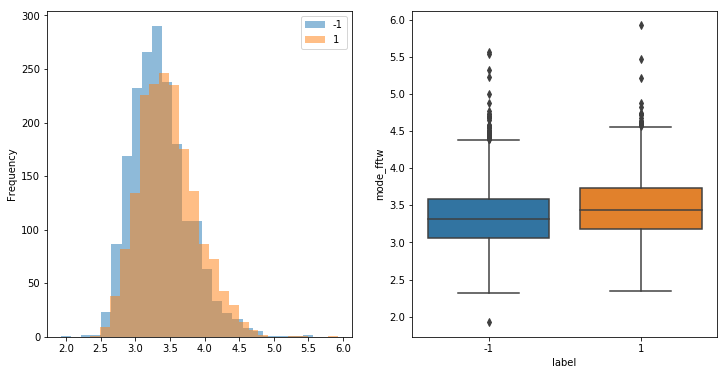

In [47]:
fig, ax = plt.subplots(ncols=2,figsize=(12,6))
df_feature.groupby("label")["mode_fftw"].plot.hist(legend=True,bins=25,alpha=0.5,ax =ax[0])
sns.boxplot(x = 'label', y = 'mode_fftw', data = df_feature,ax=ax[1])

# Power Spectral Density

In [48]:
from scipy.signal import welch


In [49]:
freq_value, _w =welch(result.iloc[0])

In [50]:
result_psd = pd.DataFrame([ welch(result.iloc[x])[1] for x in range(0,result.shape[0])],index=df_feature.index)

In [51]:
result_psd['label'] = df_feature['label']

Text(0, 0.5, 'PSD [V**2 / Hz]')

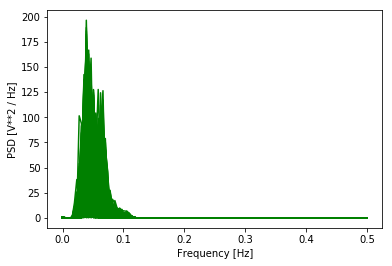

In [52]:
#Good Engine plot
result_psd_good = result_psd[result_psd['label'] == 1]
result_psd_good = result_psd_good.drop(['label'],axis=1)
for ix in range(0,result_psd_good.shape[0]):
    plt.plot(freq_value, result_psd_good.iloc[ix], linestyle='-', color='green')
plt.xlabel('Frequency [Hz]')
plt.ylabel('PSD [V**2 / Hz]')

Text(0, 0.5, 'PSD [V**2 / Hz]')

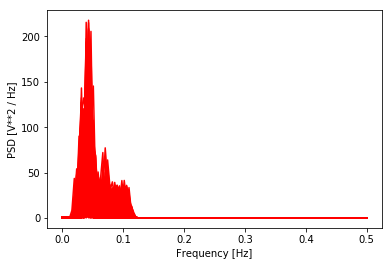

In [53]:
#Bad Engine plot
result_psd_bad = result_psd[result_psd['label'] == -1]
result_psd_bad = result_psd_bad.drop(['label'],axis=1)
for ix in range(0,result_psd_bad.shape[0]):
    plt.plot(freq_value, result_psd_bad.iloc[ix], linestyle='-', color='red')
plt.xlabel('Frequency [Hz]')
plt.ylabel('PSD [V**2 / Hz]')

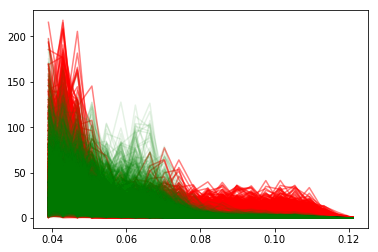

In [54]:
result_psd_good = result_psd[result_psd['label'] == 1]
result_psd_good = result_psd_good.drop(['label'],axis=1)
result_psd_bad = result_psd[result_psd['label'] == -1]
result_psd_bad = result_psd_bad.drop(['label'],axis=1)
for ix in range(0,result_psd_bad.shape[0]):
    plt.plot(freq_value[10:32], result_psd_bad.iloc[ix][10:32], linestyle='-', color='red',alpha=0.5)
for ix in range(0,result_psd_good.shape[0]):
    plt.plot(freq_value[10:32], result_psd_good.iloc[ix][10:32], linestyle='-', color='green',alpha=0.1)


In [55]:
result_psd_windowed = result_psd.drop([i for i in range(33,129)],axis=1)
result_psd_windowed = result_psd_windowed.drop([i for i in range(0,10)],axis=1)
result_psd_windowed = result_psd_windowed.drop(['label'],axis=1)
result_psd_windowed.head()

,10,11,12,13,14,15,16,17,18,19,...,23,24,25,26,27,28,29,30,31,32
file_name,,,,,,,,,,,,,,,,,,,,,
FordB_Test_1,49.972859,39.627470,24.397230,22.013146,16.792490,16.525175,15.053140,3.529743,2.611164,8.331606,...,2.345396,2.761581,1.194010,1.231001,1.501652,0.339701,0.399217,0.075538,0.007705,0.000468
FordB_Test_2,11.680475,6.642729,9.994882,14.697765,16.172337,5.801377,3.722502,12.503719,5.475312,1.884058,...,11.817390,12.403187,10.920794,8.854250,8.935786,2.451896,0.312429,0.229076,0.086842,0.003743
FordB_Test_3,31.650116,68.771493,24.733304,6.828221,6.238361,8.014122,7.480754,8.792822,19.783003,15.367871,...,8.669659,1.603351,0.825566,0.893925,0.330837,0.742101,1.352451,1.040004,0.153654,0.009418
FordB_Test_4,38.222963,18.358787,6.882296,1.691320,6.369813,7.703150,6.533929,3.735104,4.305811,3.576586,...,0.840475,0.767136,0.944666,0.996188,2.810337,2.276932,0.535269,0.028921,0.012913,0.002239
FordB_Test_5,122.893146,77.606484,12.520303,2.844460,0.703142,1.382016,0.666224,1.329185,3.891851,6.104984,...,0.425679,0.170474,0.105105,0.435181,0.197813,0.108964,0.019927,0.073140,0.006784,0.000103


In [56]:
#adding columns in feature df, each column represent a feature
df_feature["mean_psd"] = result_psd_windowed.mean(axis=1)
df_feature["var_psd"] = result_psd_windowed.var(axis=1)
df_feature["std_psd"] = result_psd_windowed.std(axis=1)
df_feature["skew_psd"] = result_psd_windowed.skew(axis=1)
df_feature["kurt_psd"] = result_psd_windowed.kurt(axis=1)
df_feature["mode_psd"] = result_psd_windowed.max(axis=1) - result.min(axis=1)
df_feature["kurtosis_psd"] = result_psd_windowed.kurtosis(axis=1)

Mean Plot

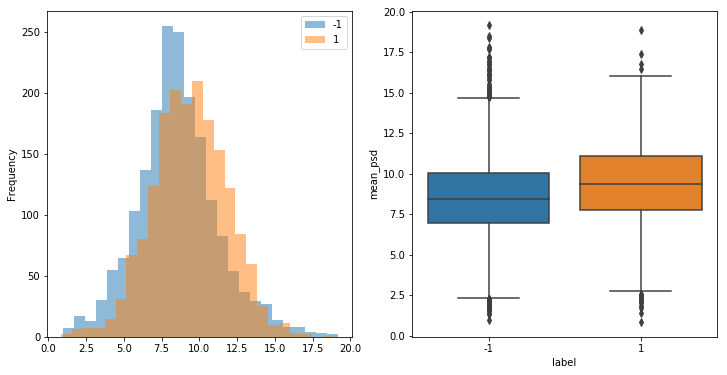

In [57]:
fig, ax = plt.subplots(ncols=2,figsize=(12,6))
df_feature.groupby("label")["mean_psd"].plot.hist(legend=True,bins=25,alpha=0.5,ax =ax[0])
sns.boxplot(x = 'label', y = 'mean_psd', data = df_feature,ax=ax[1])

var

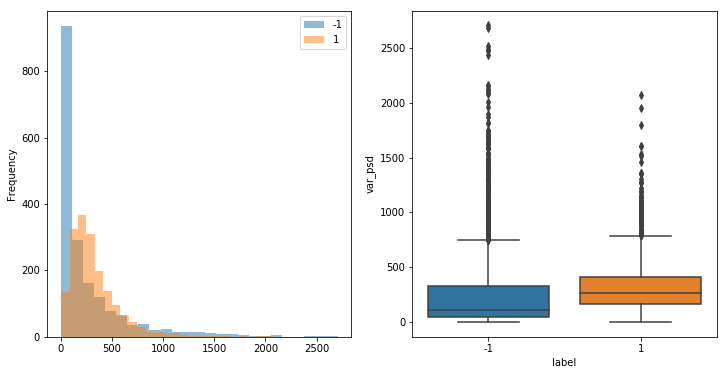

In [58]:
fig, ax = plt.subplots(ncols=2,figsize=(12,6))
df_feature.groupby("label")["var_psd"].plot.hist(legend=True,bins=25,alpha=0.5,ax =ax[0])
sns.boxplot(x = 'label', y = 'var_psd', data = df_feature,ax=ax[1])

std plot

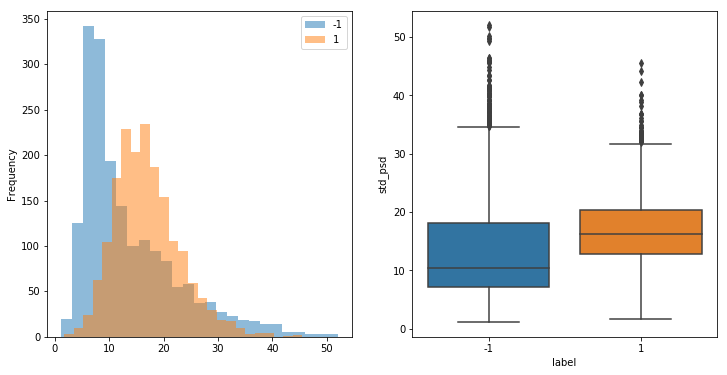

In [59]:
fig, ax = plt.subplots(ncols=2,figsize=(12,6))
df_feature.groupby("label")["std_psd"].plot.hist(legend=True,bins=25,alpha=0.5,ax =ax[0])
sns.boxplot(x = 'label', y = 'std_psd', data = df_feature,ax=ax[1])

skew plot

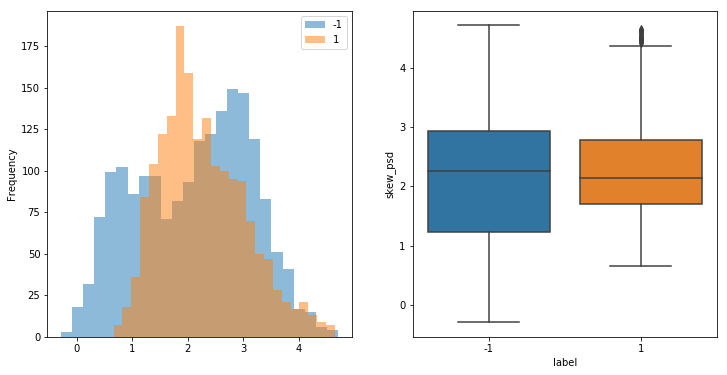

In [60]:
fig, ax = plt.subplots(ncols=2,figsize=(12,6))
df_feature.groupby("label")["skew_psd"].plot.hist(legend=True,bins=25,alpha=0.5,ax =ax[0])
sns.boxplot(x = 'label', y = 'skew_psd', data = df_feature,ax=ax[1])

kurt plot

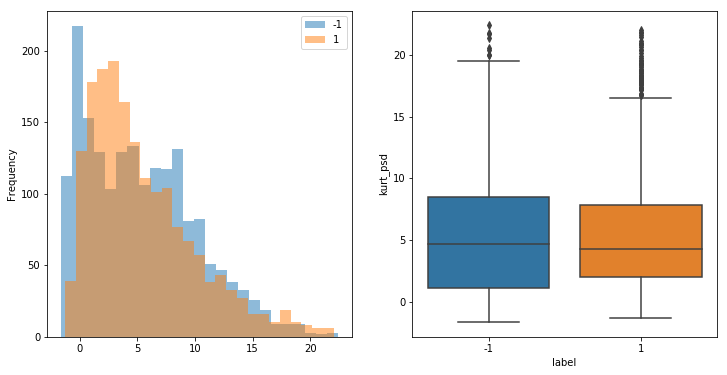

In [61]:
fig, ax = plt.subplots(ncols=2,figsize=(12,6))
df_feature.groupby("label")["kurt_psd"].plot.hist(legend=True,bins=25,alpha=0.5,ax =ax[0])
sns.boxplot(x = 'label', y = 'kurt_psd', data = df_feature,ax=ax[1])

mode plot

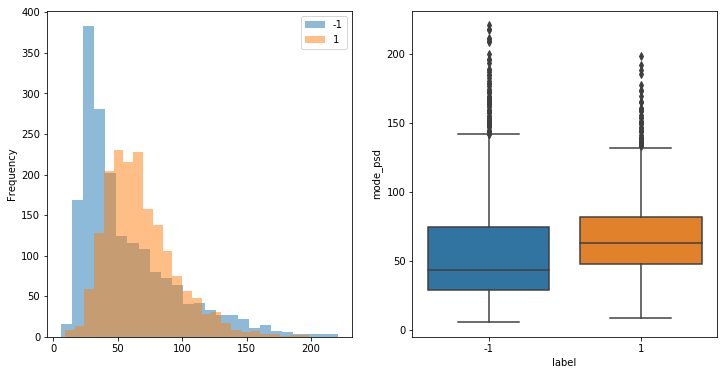

In [62]:
fig, ax = plt.subplots(ncols=2,figsize=(12,6))
df_feature.groupby("label")["mode_psd"].plot.hist(legend=True,bins=25,alpha=0.5,ax =ax[0])
sns.boxplot(x = 'label', y = 'mode_psd', data = df_feature,ax=ax[1])

# Pywavelet

Approximation coefficient contains high freq signal(passed from low pass filter) , Deatil Cofficient contains low freq signal(high pass filter).

CA - contain high freq
CD - contain low freq

Ceeating CA at 4 scales[0:250],[0,125],[0,62],[0,31]
and DC at [0,250]

In [63]:
from pywt import dwt

In [64]:
CA1 = []
CD1 = []
for x in range(0,result.shape[0]):
    cA,cD = dwt(result.iloc[x],'db1')
    CA1.append(cA)
    CD1.append(cD)

result_wave_CA1 = pd.DataFrame(CA1,index=df_feature.index)
result_wave_CD1 = pd.DataFrame(CD1,index=df_feature.index)

In [65]:
df_feature["mean_ca1"] = result_wave_CA1.mean(axis=1)
df_feature["var_ca1"] = result_wave_CA1.var(axis=1)
df_feature["std_ca1"] = result_wave_CA1.std(axis=1)
df_feature["skew_ca1"] = result_wave_CA1.skew(axis=1)
df_feature["kurt_ca1"] = result_wave_CA1.kurt(axis=1)
df_feature["mode_ca1"] = result_wave_CA1.max(axis=1) - result.min(axis=1)
df_feature["kurtosis_ca1"] = result_wave_CA1.kurtosis(axis=1)

In [66]:
df_feature["mean_cd1"] = result_wave_CD1.mean(axis=1)
df_feature["var_cd1"] = result_wave_CD1.var(axis=1)
df_feature["std_cd1"] = result_wave_CD1.std(axis=1)
df_feature["skew_cd1"] = result_wave_CD1.skew(axis=1)
df_feature["kurt_cd1"] = result_wave_CD1.kurt(axis=1)
df_feature["mode_cd1"] = result_wave_CD1.max(axis=1) - result.min(axis=1)
df_feature["kurtosis_cd1"] = result_wave_CD1.kurtosis(axis=1)

# Coefficient Approximation plot at scale1

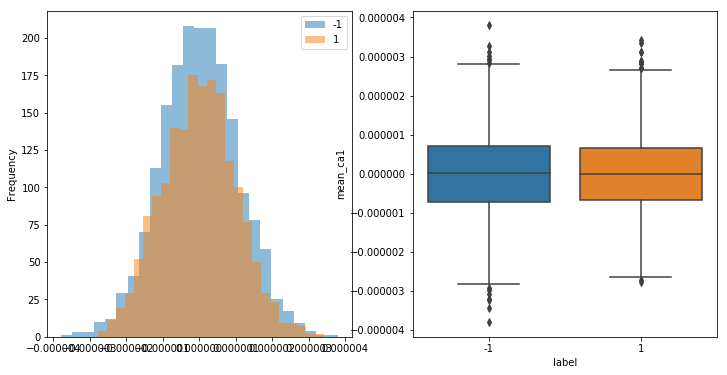

In [67]:
fig, ax = plt.subplots(ncols=2,figsize=(12,6))
df_feature.groupby("label")["mean_ca1"].plot.hist(legend=True,bins=25,alpha=0.5,ax =ax[0])
sns.boxplot(x = 'label', y = 'mean_ca1', data = df_feature,ax=ax[1])

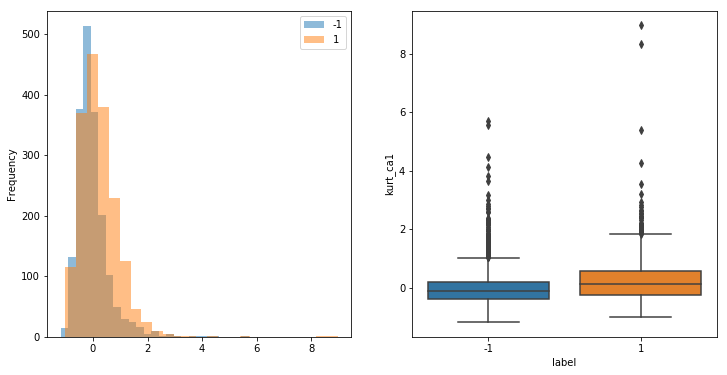

In [68]:
fig, ax = plt.subplots(ncols=2,figsize=(12,6))
df_feature.groupby("label")["kurt_ca1"].plot.hist(legend=True,bins=25,alpha=0.5,ax =ax[0])
sns.boxplot(x = 'label', y = 'kurt_ca1', data = df_feature,ax=ax[1])

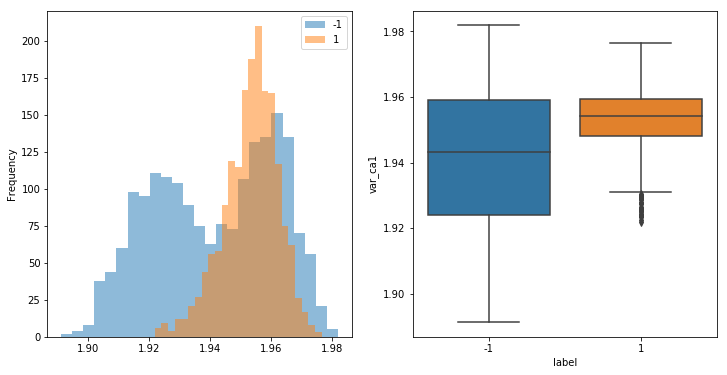

In [69]:
fig, ax = plt.subplots(ncols=2,figsize=(12,6))
df_feature.groupby("label")["var_ca1"].plot.hist(legend=True,bins=25,alpha=0.5,ax =ax[0])
sns.boxplot(x = 'label', y = 'var_ca1', data = df_feature,ax=ax[1])

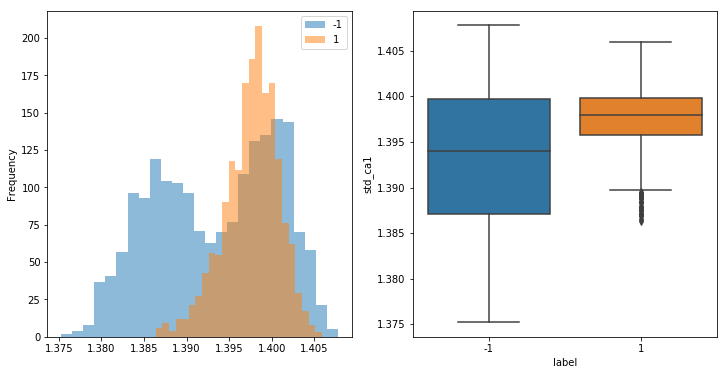

In [70]:
fig, ax = plt.subplots(ncols=2,figsize=(12,6))
df_feature.groupby("label")["std_ca1"].plot.hist(legend=True,bins=25,alpha=0.5,ax =ax[0])
sns.boxplot(x = 'label', y = 'std_ca1', data = df_feature,ax=ax[1])

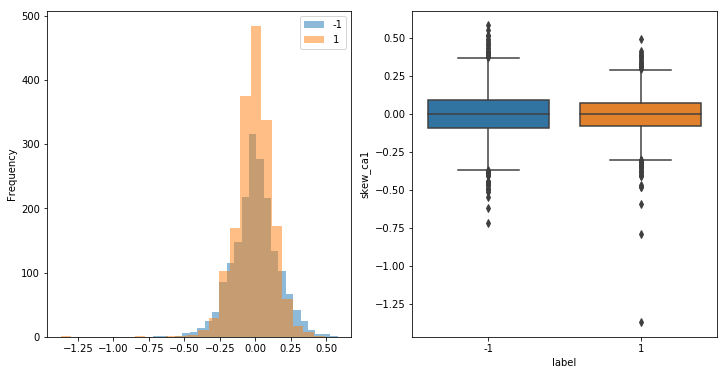

In [71]:
fig, ax = plt.subplots(ncols=2,figsize=(12,6))
df_feature.groupby("label")["skew_ca1"].plot.hist(legend=True,bins=25,alpha=0.5,ax =ax[0])
sns.boxplot(x = 'label', y = 'skew_ca1', data = df_feature,ax=ax[1])

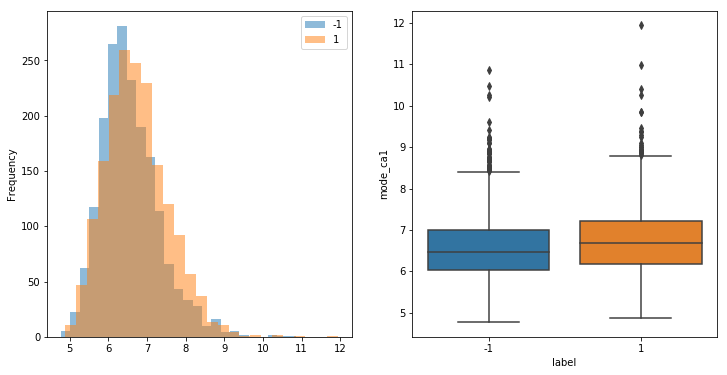

In [72]:
fig, ax = plt.subplots(ncols=2,figsize=(12,6))
df_feature.groupby("label")["mode_ca1"].plot.hist(legend=True,bins=25,alpha=0.5,ax =ax[0])
sns.boxplot(x = 'label', y = 'mode_ca1', data = df_feature,ax=ax[1])

# Coefficient Details plot 

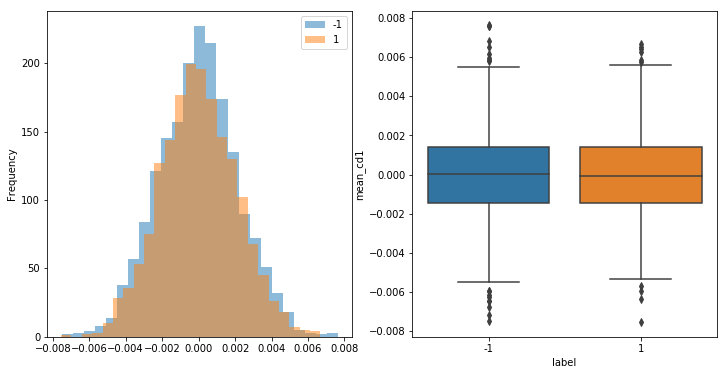

In [73]:
fig, ax = plt.subplots(ncols=2,figsize=(12,6))
df_feature.groupby("label")["mean_cd1"].plot.hist(legend=True,bins=25,alpha=0.5,ax =ax[0])
sns.boxplot(x = 'label', y = 'mean_cd1', data = df_feature,ax=ax[1])

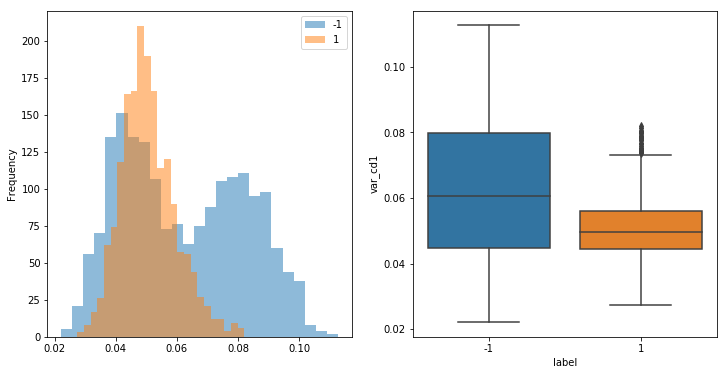

In [74]:
fig, ax = plt.subplots(ncols=2,figsize=(12,6))
df_feature.groupby("label")["var_cd1"].plot.hist(legend=True,bins=25,alpha=0.5,ax =ax[0])
sns.boxplot(x = 'label', y = 'var_cd1', data = df_feature,ax=ax[1])

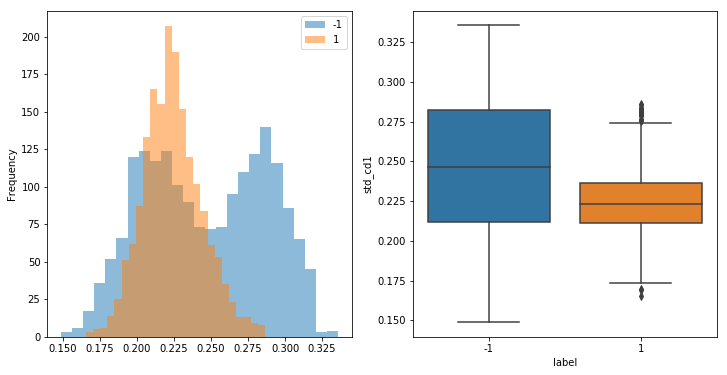

In [75]:
fig, ax = plt.subplots(ncols=2,figsize=(12,6))
df_feature.groupby("label")["std_cd1"].plot.hist(legend=True,bins=25,alpha=0.5,ax =ax[0])
sns.boxplot(x = 'label', y = 'std_cd1', data = df_feature,ax=ax[1])

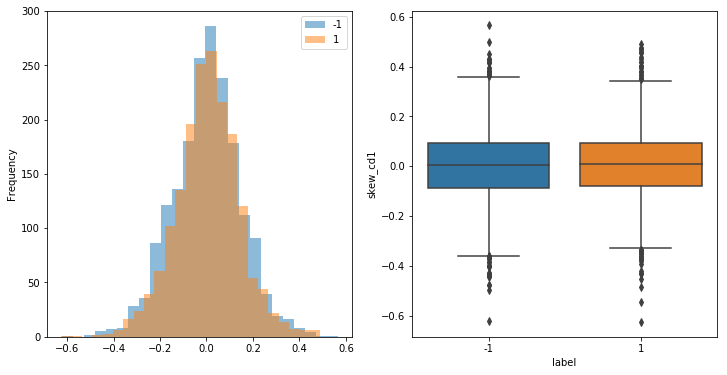

In [76]:
fig, ax = plt.subplots(ncols=2,figsize=(12,6))
df_feature.groupby("label")["skew_cd1"].plot.hist(legend=True,bins=25,alpha=0.5,ax =ax[0])
sns.boxplot(x = 'label', y = 'skew_cd1', data = df_feature,ax=ax[1])

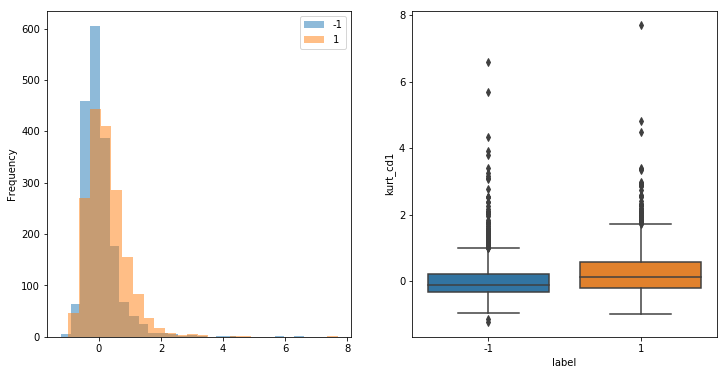

In [77]:
fig, ax = plt.subplots(ncols=2,figsize=(12,6))
df_feature.groupby("label")["kurt_cd1"].plot.hist(legend=True,bins=25,alpha=0.5,ax =ax[0])
sns.boxplot(x = 'label', y = 'kurt_cd1', data = df_feature,ax=ax[1])

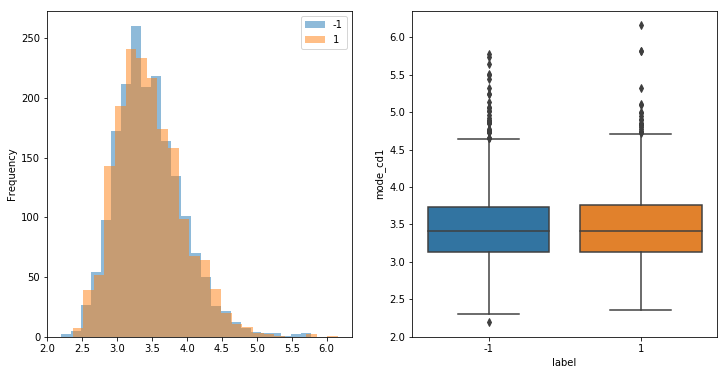

In [78]:
fig, ax = plt.subplots(ncols=2,figsize=(12,6))
df_feature.groupby("label")["mode_cd1"].plot.hist(legend=True,bins=25,alpha=0.5,ax =ax[0])
sns.boxplot(x = 'label', y = 'mode_cd1', data = df_feature,ax=ax[1])

## Coefficient Approximation at scale 2

In [79]:
CA2 = []

for x in range(0,result_wave_CA1.shape[0]):
    cA,cD = dwt(result_wave_CA1.iloc[x],'db1')
    CA2.append(cA)

result_wave_CA2 = pd.DataFrame(CA2,index=df_feature.index)

In [80]:
df_feature["mean_ca2"] = result_wave_CA1.mean(axis=1)
df_feature["var_ca2"] = result_wave_CA1.var(axis=1)
df_feature["std_ca2"] = result_wave_CA1.std(axis=1)
df_feature["skew_ca2"] = result_wave_CA1.skew(axis=1)
df_feature["kurt_ca2"] = result_wave_CA1.kurt(axis=1)
df_feature["mode_ca2"] = result_wave_CA1.max(axis=1) - result.min(axis=1)
df_feature["kurtosis_ca2"] = result_wave_CA1.kurtosis(axis=1)

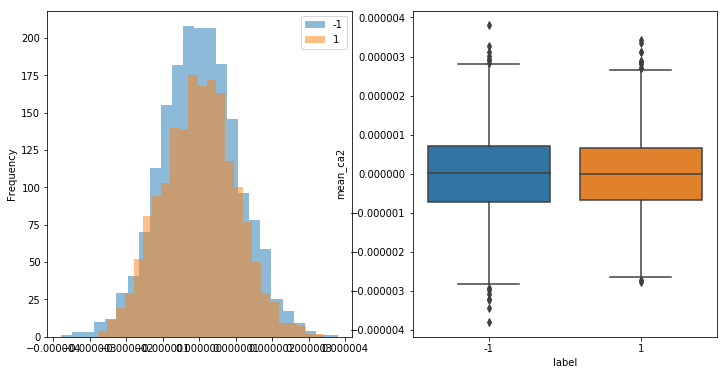

In [81]:
fig, ax = plt.subplots(ncols=2,figsize=(12,6))
df_feature.groupby("label")["mean_ca2"].plot.hist(legend=True,bins=25,alpha=0.5,ax =ax[0])
sns.boxplot(x = 'label', y = 'mean_ca2', data = df_feature,ax=ax[1])

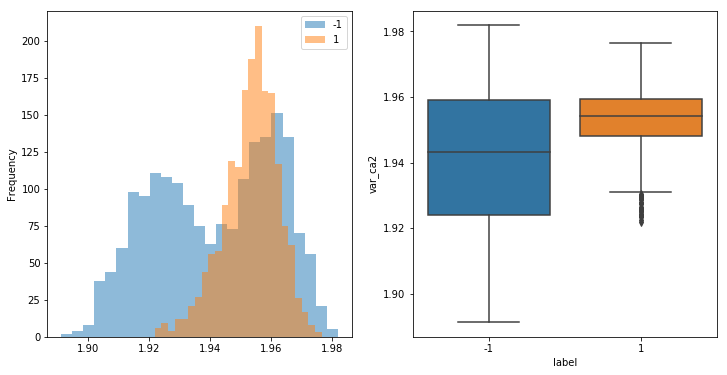

In [82]:
fig, ax = plt.subplots(ncols=2,figsize=(12,6))
df_feature.groupby("label")["var_ca2"].plot.hist(legend=True,bins=25,alpha=0.5,ax =ax[0])
sns.boxplot(x = 'label', y = 'var_ca2', data = df_feature,ax=ax[1])

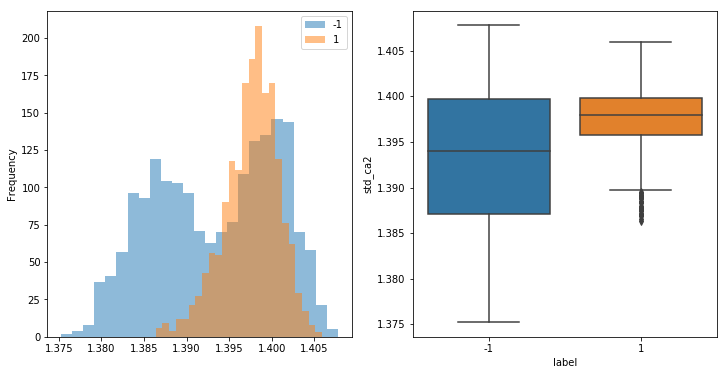

In [83]:
fig, ax = plt.subplots(ncols=2,figsize=(12,6))
df_feature.groupby("label")["std_ca2"].plot.hist(legend=True,bins=25,alpha=0.5,ax =ax[0])
sns.boxplot(x = 'label', y = 'std_ca2', data = df_feature,ax=ax[1])

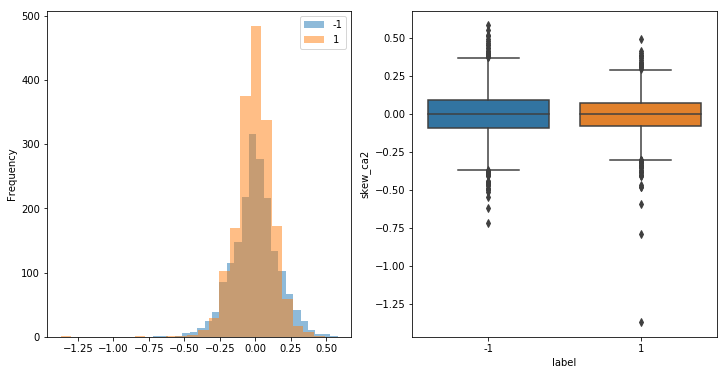

In [84]:
fig, ax = plt.subplots(ncols=2,figsize=(12,6))
df_feature.groupby("label")["skew_ca2"].plot.hist(legend=True,bins=25,alpha=0.5,ax =ax[0])
sns.boxplot(x = 'label', y = 'skew_ca2', data = df_feature,ax=ax[1])

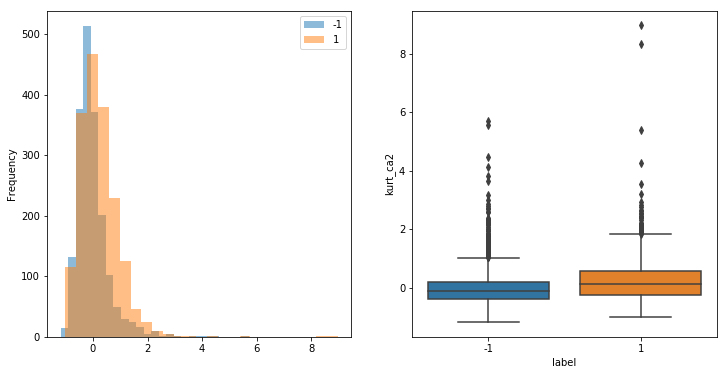

In [85]:
fig, ax = plt.subplots(ncols=2,figsize=(12,6))
df_feature.groupby("label")["kurt_ca2"].plot.hist(legend=True,bins=25,alpha=0.5,ax =ax[0])
sns.boxplot(x = 'label', y = 'kurt_ca2', data = df_feature,ax=ax[1])

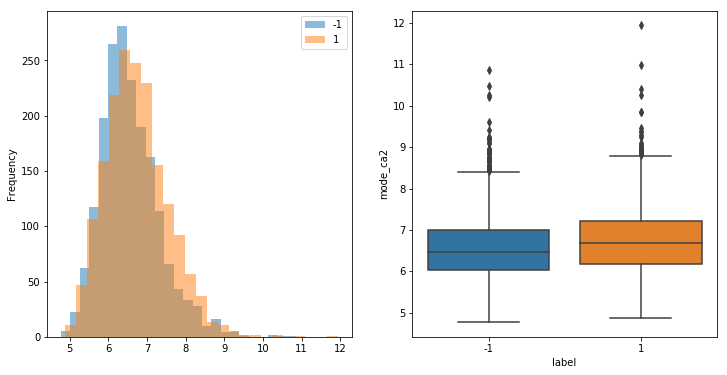

In [86]:
fig, ax = plt.subplots(ncols=2,figsize=(12,6))
df_feature.groupby("label")["mode_ca2"].plot.hist(legend=True,bins=25,alpha=0.5,ax =ax[0])
sns.boxplot(x = 'label', y = 'mode_ca2', data = df_feature,ax=ax[1])

# Coeefficient approximation scale 3

In [87]:
CA3 = []

for x in range(0,result_wave_CA2.shape[0]):
    cA,cD = dwt(result_wave_CA2.iloc[x],'db1')
    CA3.append(cA)

result_wave_CA3 = pd.DataFrame(CA3,index=df_feature.index)

In [88]:
df_feature["mean_ca3"] = result_wave_CA3.mean(axis=1)
df_feature["var_ca3"] = result_wave_CA3.var(axis=1)
df_feature["std_ca3"] = result_wave_CA3.std(axis=1)
df_feature["skew_ca3"] = result_wave_CA3.skew(axis=1)
df_feature["kurt_ca3"] = result_wave_CA3.kurt(axis=1)
df_feature["mode_ca3"] = result_wave_CA3.max(axis=1) - result.min(axis=1)
df_feature["kurtosis_ca3"] = result_wave_CA3.kurtosis(axis=1)

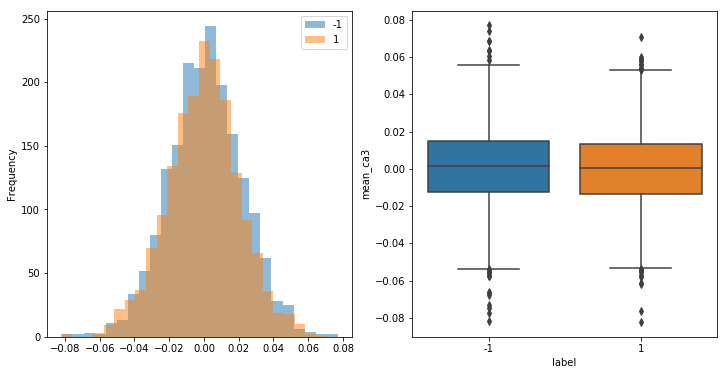

In [89]:
fig, ax = plt.subplots(ncols=2,figsize=(12,6))
df_feature.groupby("label")["mean_ca3"].plot.hist(legend=True,bins=25,alpha=0.5,ax =ax[0])
sns.boxplot(x = 'label', y = 'mean_ca3', data = df_feature,ax=ax[1])

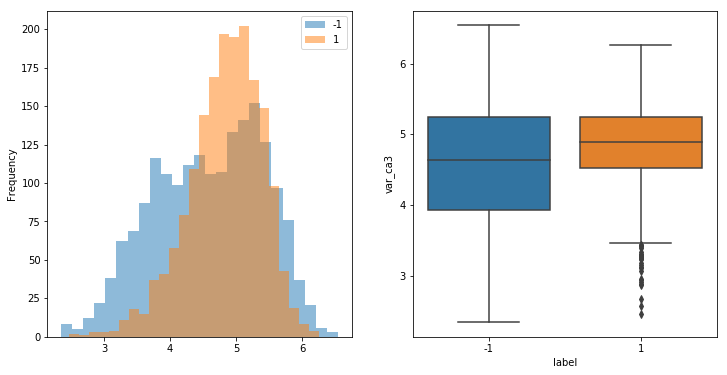

In [90]:
fig, ax = plt.subplots(ncols=2,figsize=(12,6))
df_feature.groupby("label")["var_ca3"].plot.hist(legend=True,bins=25,alpha=0.5,ax =ax[0])
sns.boxplot(x = 'label', y = 'var_ca3', data = df_feature,ax=ax[1])

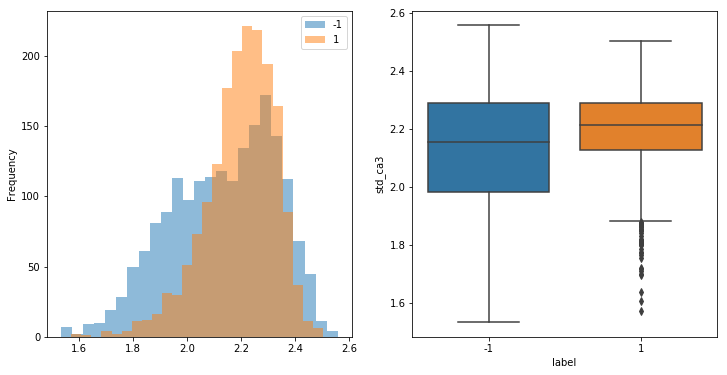

In [91]:
fig, ax = plt.subplots(ncols=2,figsize=(12,6))
df_feature.groupby("label")["std_ca3"].plot.hist(legend=True,bins=25,alpha=0.5,ax =ax[0])
sns.boxplot(x = 'label', y = 'std_ca3', data = df_feature,ax=ax[1])

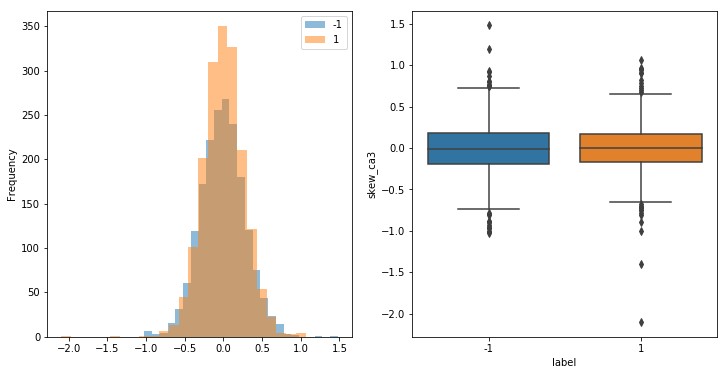

In [92]:
fig, ax = plt.subplots(ncols=2,figsize=(12,6))
df_feature.groupby("label")["skew_ca3"].plot.hist(legend=True,bins=25,alpha=0.5,ax =ax[0])
sns.boxplot(x = 'label', y = 'skew_ca3', data = df_feature,ax=ax[1])

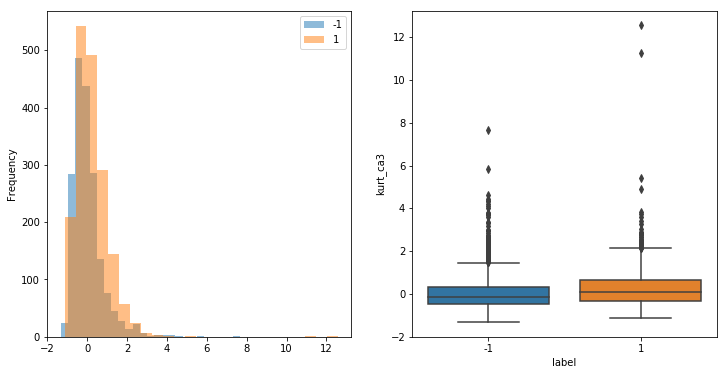

In [93]:
fig, ax = plt.subplots(ncols=2,figsize=(12,6))
df_feature.groupby("label")["kurt_ca3"].plot.hist(legend=True,bins=25,alpha=0.5,ax =ax[0])
sns.boxplot(x = 'label', y = 'kurt_ca3', data = df_feature,ax=ax[1])

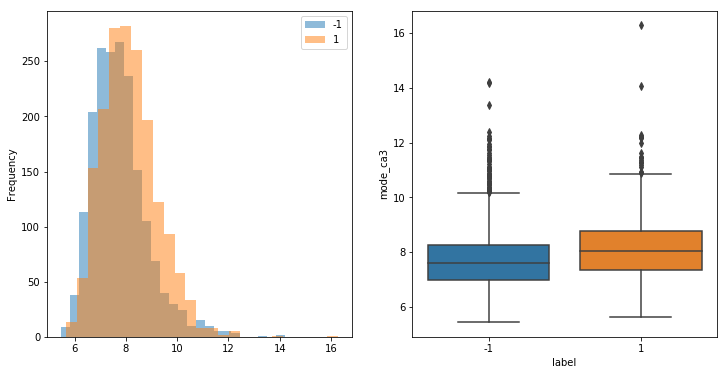

In [94]:
fig, ax = plt.subplots(ncols=2,figsize=(12,6))
df_feature.groupby("label")["mode_ca3"].plot.hist(legend=True,bins=25,alpha=0.5,ax =ax[0])
sns.boxplot(x = 'label', y = 'mode_ca3', data = df_feature,ax=ax[1])

## Coefficient approximaion scale4

In [95]:
CA4 = []

for x in range(0,result_wave_CA3.shape[0]):
    cA,cD = dwt(result_wave_CA3.iloc[x],'db1')
    CA4.append(cA)

result_wave_CA4 = pd.DataFrame(CA4,index=df_feature.index)

In [96]:
df_feature["mean_ca4"] = result_wave_CA4.mean(axis=1)
df_feature["var_ca4"] = result_wave_CA4.var(axis=1)
df_feature["std_ca4"] = result_wave_CA4.std(axis=1)
df_feature["skew_ca4"] = result_wave_CA4.skew(axis=1)
df_feature["kurt_ca4"] = result_wave_CA4.kurt(axis=1)
df_feature["mode_ca4"] = result_wave_CA4.max(axis=1) - result.min(axis=1)
df_feature["kurtosis_ca4"] = result_wave_CA4.kurtosis(axis=1)

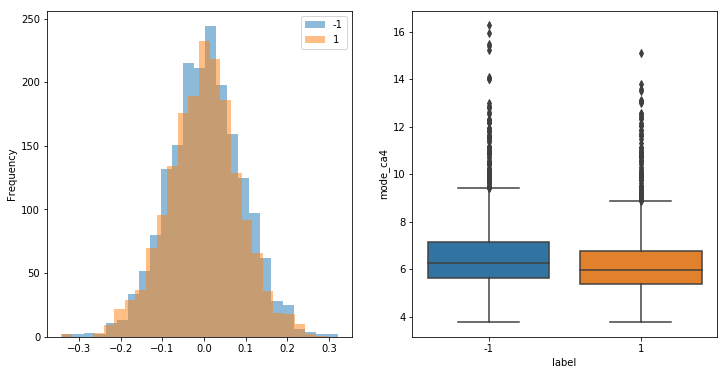

In [97]:
fig, ax = plt.subplots(ncols=2,figsize=(12,6))
df_feature.groupby("label")["mean_ca4"].plot.hist(legend=True,bins=25,alpha=0.5,ax =ax[0])
sns.boxplot(x = 'label', y = 'mode_ca4', data = df_feature,ax=ax[1])

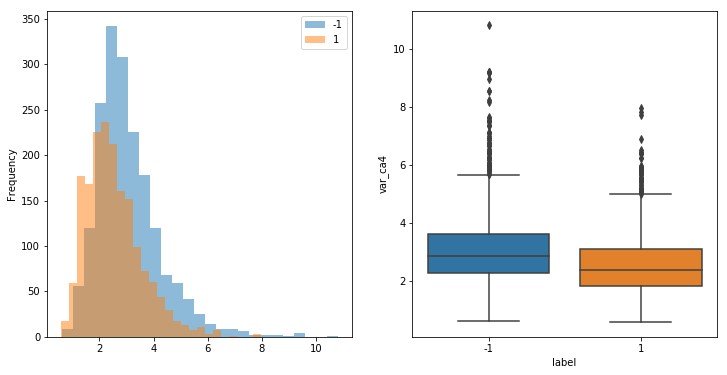

In [98]:
fig, ax = plt.subplots(ncols=2,figsize=(12,6))
df_feature.groupby("label")["var_ca4"].plot.hist(legend=True,bins=25,alpha=0.5,ax =ax[0])
sns.boxplot(x = 'label', y = 'var_ca4', data = df_feature,ax=ax[1])

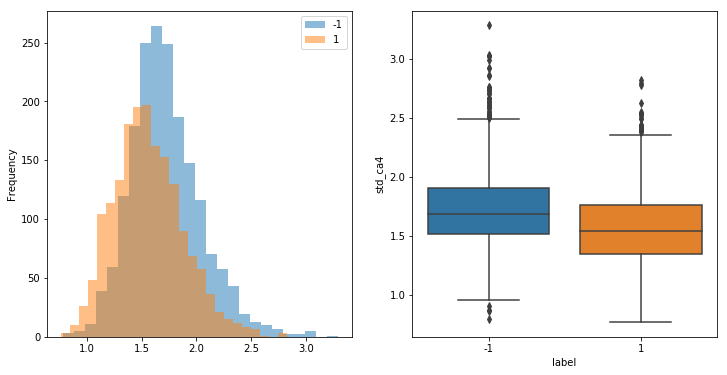

In [99]:
fig, ax = plt.subplots(ncols=2,figsize=(12,6))
df_feature.groupby("label")["std_ca4"].plot.hist(legend=True,bins=25,alpha=0.5,ax =ax[0])
sns.boxplot(x = 'label', y = 'std_ca4', data = df_feature,ax=ax[1])

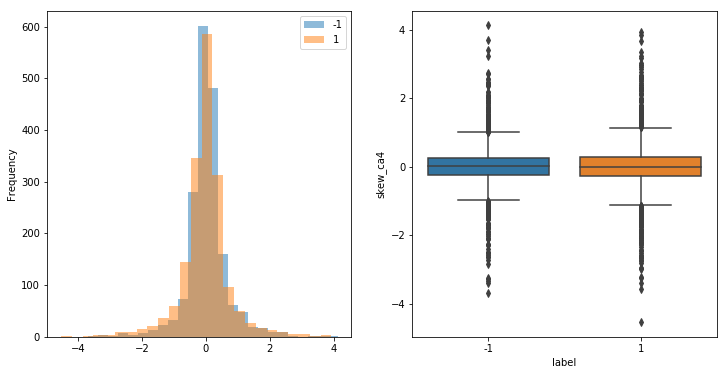

In [100]:
fig, ax = plt.subplots(ncols=2,figsize=(12,6))
df_feature.groupby("label")["skew_ca4"].plot.hist(legend=True,bins=25,alpha=0.5,ax =ax[0])
sns.boxplot(x = 'label', y = 'skew_ca4', data = df_feature,ax=ax[1])

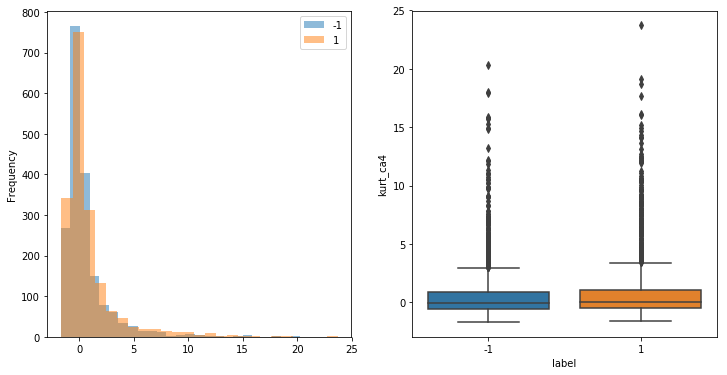

In [101]:
fig, ax = plt.subplots(ncols=2,figsize=(12,6))
df_feature.groupby("label")["kurt_ca4"].plot.hist(legend=True,bins=25,alpha=0.5,ax =ax[0])
sns.boxplot(x = 'label', y = 'kurt_ca4', data = df_feature,ax=ax[1])

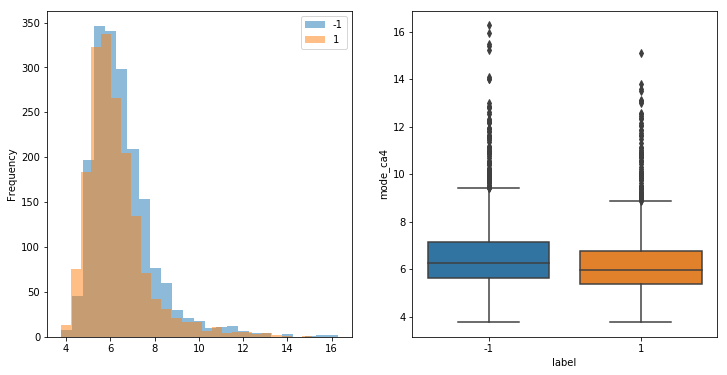

In [102]:
fig, ax = plt.subplots(ncols=2,figsize=(12,6))
df_feature.groupby("label")["mode_ca4"].plot.hist(legend=True,bins=25,alpha=0.5,ax =ax[0])
sns.boxplot(x = 'label', y = 'mode_ca4', data = df_feature,ax=ax[1])

# Autocorelation

In [103]:
def autocorr(x):
    result = np.correlate(x, x, mode='full')
    return result[len(result)//2:]

In [104]:
arr = []
for i in range(0,result.shape[0]):
    ar = autocorr(result.iloc[i])
    arr.append(ar)  

result_ac = pd.DataFrame(arr,index=df_feature.index)
#result_psd = pd.DataFrame([ welch(result.iloc[x])[1] for x in range(0,result.shape[0])],index=df_feature.index)

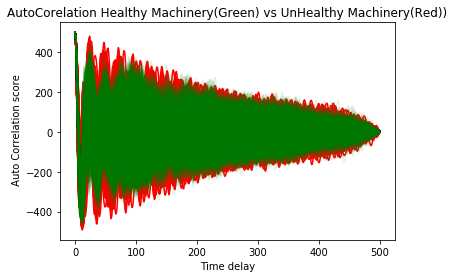

In [105]:
# FFT superimpose Good engine vs Bad engine
result_ac['label'] = df_feature['label']
result_ac_good = result_ac[result_ac['label'] == 1]
result_ac_good = result_ac_good.drop(['label'],axis=1)
result_ac_bad = result_ac[result_ac['label'] == -1]
result_ac_bad = result_ac_bad.drop(['label'],axis=1)
for ix in range(0,result_ac_bad.shape[0]):
    plt.plot([i for i in range(0,500)], result_ac_bad.iloc[ix][0:500], linestyle='-', color='red')
for ix in range(0,result_ac_good.shape[0]):
    plt.plot([i for i in range(0,500)], result_ac_good.iloc[ix][0:500], linestyle='-', color='green',alpha = 0.1)

plt.xlabel('Time delay')
plt.ylabel(' Auto Correlation score')
plt.title('AutoCorelation Healthy Machinery(Green) vs UnHealthy Machinery(Red))');